In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
plt.rc('font', family='Malgun Gothic')

# 데이터 로드
df1 = pd.read_csv('data/서울시 무더위쉼터.csv')
df1

,시설년도,위치코드,시설구분1,시설구분2,쉼터명칭,도로명주소,지번주소,시설면적,이용가능인원,비고,경도,위도,X좌표(EPSG:5186),Y좌표(EPSG:5186)
0,2025,1144073000,특정계층이용시설,회원이용시설,백합경로당,서울특별시 마포구 월드컵로 215,서울특별시 마포구 성산동 595,122.00,36.0,NaN,126.901103,37.564513,191262.525733,551668.855561
1,2025,1144073000,특정계층이용시설,회원이용시설,낙루경로당,서울특별시 마포구 월드컵북로38나길 25,서울특별시 마포구 중동 36-27,72.00,21.0,NaN,126.906664,37.570611,191754.517517,552345.193318
2,2025,1144073000,특정계층이용시설,회원이용시설,무리울새마을경로당,서울특별시 마포구 월드컵북로 198-17,서울특별시 마포구 성산동 산 41-2,175.00,53.0,NaN,126.907256,37.568913,191806.621164,552156.616667
3,2025,1144073000,특정계층이용시설,회원이용시설,샛터경로당,서울특별시 마포구 새터산2길 7,서울특별시 마포구 성산동 200-309,144.00,43.0,NaN,126.907542,37.565137,191831.466496,551737.566410
4,2025,1144073000,공공시설,공공청사,성산2동주민센터,서울특별시 마포구 월드컵북로30길 22,서울특별시 마포구 성산동 603,69.00,20.0,NaN,126.908982,37.568578,191959.058356,552119.330878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,2025,1174053000,생활밀착민간시설,금융기관,신한은행굽은다리역지점,서울특별시 강동구 양재대로 1568,서울특별시 강동구 명일동 353-2,50.00,15.0,시설 운영시간 내 쉼터 탄력적 운영(공휴일 등 미운영) 2025. 5월 사전점검:...,127.143300,37.545400,212663.693761,549552.604866
3799,2025,1174053000,생활밀착민간시설,금융기관,신한은행명일역지점,서울특별시 강동구 구천면로 427,서울특별시 강동구 명일동 315-13,50.00,15.0,시설 운영시간 내 쉼터 탄력적 운영(공휴일 등 미운영),127.146147,37.550505,212914.399091,550119.597135
3800,2025,1174053000,생활밀착민간시설,금융기관,하나은행강동중앙지점,서울특별시 강동구 양재대로 1566,서울특별시 강동구 명일동 353-3,50.00,15.0,시설 운영시간 내 쉼터 탄력적 운영(공휴일 등 미운영),127.143181,37.545225,212653.198189,549533.199231
3801,2025,1174053000,생활밀착민간시설,금융기관,강동농협명일역지점,서울특별시 강동구 양재대로 1655,서울특별시 강동구 명일동 306-5,200.00,61.0,시설 운영시간 내 쉼터 탄력적 운영(공휴일 등 미운영),127.143875,37.553562,212713.121286,550458.567012


In [3]:
# 시설년도가 싹 다 2025년이라 불필요, 위치코드 불필요

df1.drop('시설년도', axis=1, inplace = True)
df1.drop('위치코드', axis=1, inplace = True)
df1

,시설구분1,시설구분2,쉼터명칭,도로명주소,지번주소,시설면적,이용가능인원,비고,경도,위도,X좌표(EPSG:5186),Y좌표(EPSG:5186)
0,특정계층이용시설,회원이용시설,백합경로당,서울특별시 마포구 월드컵로 215,서울특별시 마포구 성산동 595,122.00,36.0,NaN,126.901103,37.564513,191262.525733,551668.855561
1,특정계층이용시설,회원이용시설,낙루경로당,서울특별시 마포구 월드컵북로38나길 25,서울특별시 마포구 중동 36-27,72.00,21.0,NaN,126.906664,37.570611,191754.517517,552345.193318
2,특정계층이용시설,회원이용시설,무리울새마을경로당,서울특별시 마포구 월드컵북로 198-17,서울특별시 마포구 성산동 산 41-2,175.00,53.0,NaN,126.907256,37.568913,191806.621164,552156.616667
3,특정계층이용시설,회원이용시설,샛터경로당,서울특별시 마포구 새터산2길 7,서울특별시 마포구 성산동 200-309,144.00,43.0,NaN,126.907542,37.565137,191831.466496,551737.566410
4,공공시설,공공청사,성산2동주민센터,서울특별시 마포구 월드컵북로30길 22,서울특별시 마포구 성산동 603,69.00,20.0,NaN,126.908982,37.568578,191959.058356,552119.330878
...,...,...,...,...,...,...,...,...,...,...,...,...
3798,생활밀착민간시설,금융기관,신한은행굽은다리역지점,서울특별시 강동구 양재대로 1568,서울특별시 강동구 명일동 353-2,50.00,15.0,시설 운영시간 내 쉼터 탄력적 운영(공휴일 등 미운영) 2025. 5월 사전점검:...,127.143300,37.545400,212663.693761,549552.604866
3799,생활밀착민간시설,금융기관,신한은행명일역지점,서울특별시 강동구 구천면로 427,서울특별시 강동구 명일동 315-13,50.00,15.0,시설 운영시간 내 쉼터 탄력적 운영(공휴일 등 미운영),127.146147,37.550505,212914.399091,550119.597135
3800,생활밀착민간시설,금융기관,하나은행강동중앙지점,서울특별시 강동구 양재대로 1566,서울특별시 강동구 명일동 353-3,50.00,15.0,시설 운영시간 내 쉼터 탄력적 운영(공휴일 등 미운영),127.143181,37.545225,212653.198189,549533.199231
3801,생활밀착민간시설,금융기관,강동농협명일역지점,서울특별시 강동구 양재대로 1655,서울특별시 강동구 명일동 306-5,200.00,61.0,시설 운영시간 내 쉼터 탄력적 운영(공휴일 등 미운영),127.143875,37.553562,212713.121286,550458.567012


In [5]:
# 결측치 있는지 확인

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시설구분1           3803 non-null   object 
 1   시설구분2           3803 non-null   object 
 2   쉼터명칭            3803 non-null   object 
 3   도로명주소           3750 non-null   object 
 4   지번주소            3803 non-null   object 
 5   시설면적            3076 non-null   object 
 6   이용가능인원          3027 non-null   float64
 7   비고              477 non-null    object 
 8   경도              3803 non-null   float64
 9   위도              3803 non-null   float64
 10  X좌표(EPSG:5186)  3803 non-null   float64
 11  Y좌표(EPSG:5186)  3803 non-null   float64
dtypes: float64(5), object(7)
memory usage: 356.7+ KB


In [7]:
# 자치구 추출
# 도로명주소는 결측치가 많음...지번주소로 진행

gu = []
for i in df1['지번주소']:
    i = i.split(' ')[1]
    gu.append(i)
df1['자치구'] = gu
df1.drop('지번주소', axis = 1 ,inplace=True)
df1

,시설구분1,시설구분2,쉼터명칭,도로명주소,시설면적,이용가능인원,비고,경도,위도,X좌표(EPSG:5186),Y좌표(EPSG:5186),자치구
0,특정계층이용시설,회원이용시설,백합경로당,서울특별시 마포구 월드컵로 215,122.00,36.0,NaN,126.901103,37.564513,191262.525733,551668.855561,마포구
1,특정계층이용시설,회원이용시설,낙루경로당,서울특별시 마포구 월드컵북로38나길 25,72.00,21.0,NaN,126.906664,37.570611,191754.517517,552345.193318,마포구
2,특정계층이용시설,회원이용시설,무리울새마을경로당,서울특별시 마포구 월드컵북로 198-17,175.00,53.0,NaN,126.907256,37.568913,191806.621164,552156.616667,마포구
3,특정계층이용시설,회원이용시설,샛터경로당,서울특별시 마포구 새터산2길 7,144.00,43.0,NaN,126.907542,37.565137,191831.466496,551737.566410,마포구
4,공공시설,공공청사,성산2동주민센터,서울특별시 마포구 월드컵북로30길 22,69.00,20.0,NaN,126.908982,37.568578,191959.058356,552119.330878,마포구
...,...,...,...,...,...,...,...,...,...,...,...,...
3798,생활밀착민간시설,금융기관,신한은행굽은다리역지점,서울특별시 강동구 양재대로 1568,50.00,15.0,시설 운영시간 내 쉼터 탄력적 운영(공휴일 등 미운영) 2025. 5월 사전점검:...,127.143300,37.545400,212663.693761,549552.604866,강동구
3799,생활밀착민간시설,금융기관,신한은행명일역지점,서울특별시 강동구 구천면로 427,50.00,15.0,시설 운영시간 내 쉼터 탄력적 운영(공휴일 등 미운영),127.146147,37.550505,212914.399091,550119.597135,강동구
3800,생활밀착민간시설,금융기관,하나은행강동중앙지점,서울특별시 강동구 양재대로 1566,50.00,15.0,시설 운영시간 내 쉼터 탄력적 운영(공휴일 등 미운영),127.143181,37.545225,212653.198189,549533.199231,강동구
3801,생활밀착민간시설,금융기관,강동농협명일역지점,서울특별시 강동구 양재대로 1655,200.00,61.0,시설 운영시간 내 쉼터 탄력적 운영(공휴일 등 미운영),127.143875,37.553562,212713.121286,550458.567012,강동구


In [9]:
# 자치구별 무더위쉼터 수

gu_count = df1['자치구'].value_counts()
gu_count

자치구
노원구     290
성북구     261
구로구     251
강동구     224
성동구     214
은평구     198
양천구     195
송파구     187
영등포구    185
강서구     177
동작구     167
도봉구     166
중랑구     154
서대문구    134
관악구     134
서초구     107
강남구     104
광진구     102
금천구      91
강북구      90
용산구      86
마포구      82
동대문구     70
종로구      67
중구       67
Name: count, dtype: int64

In [11]:
# 오름차순 정렬

gu_count = gu_count.sort_values()
gu_count

자치구
중구       67
종로구      67
동대문구     70
마포구      82
용산구      86
강북구      90
금천구      91
광진구     102
강남구     104
서초구     107
관악구     134
서대문구    134
중랑구     154
도봉구     166
동작구     167
강서구     177
영등포구    185
송파구     187
양천구     195
은평구     198
성동구     214
강동구     224
구로구     251
성북구     261
노원구     290
Name: count, dtype: int64

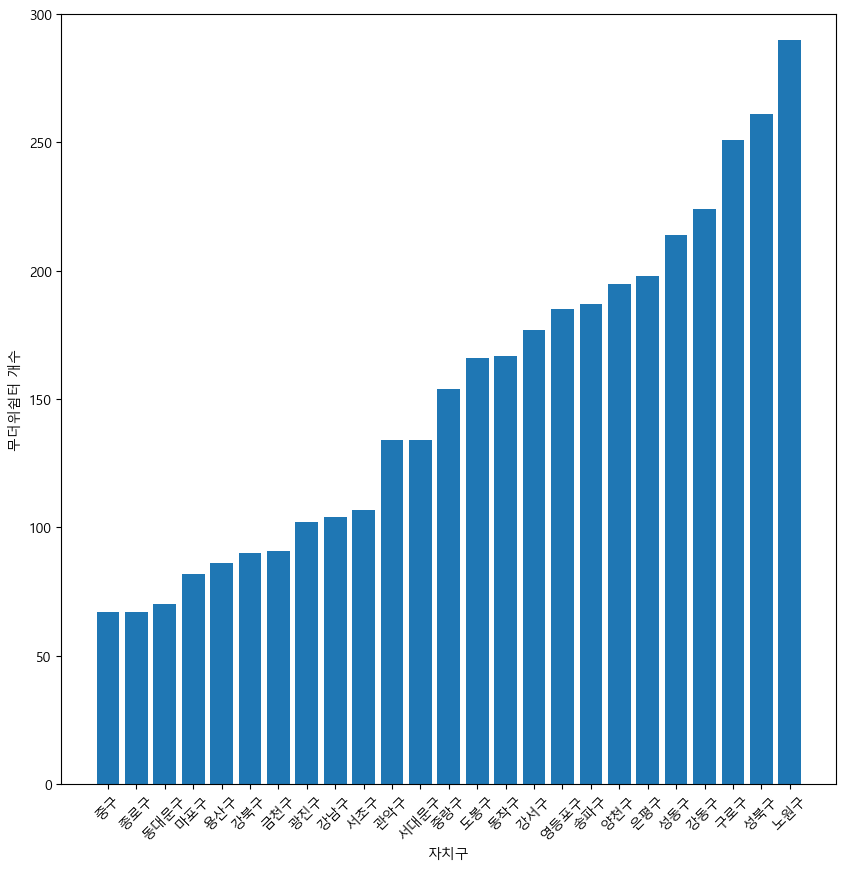

In [95]:
# 가설 1. 자치구별로 무더위쉼터 개수가 비등비등할 것이다.
# 자치구별로 차이가 꽤 많이 남! (max: 노원구 290개, min: 중구 67개)
# 중구는 왜이렇게 적을까? 노원구는 왜 많을까? 쓸데없이 많은 거 아닐까?

plt.figure(figsize=(10,10))
plt.bar(gu_count.index, gu_count)
plt.ylim(0,300)
plt.xticks(rotation = 45)
plt.xlabel('자치구')
plt.ylabel('무더위쉼터 개수')
plt.show()

In [17]:
# 데이터 로드

population = pd.read_csv('data/고령자현황_20250720105739.csv')
population

,동별(1),동별(2),2025 1/4,2025 1/4.1,2025 1/4.2,2025 1/4.3,2025 1/4.4,2025 1/4.5,2025 1/4.6,2025 1/4.7,2025 1/4.8,2025 1/4.9,2025 1/4.10,2025 1/4.11
0,동별(1),동별(2),전체인구,전체인구,전체인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구,65세이상 인구
1,동별(1),동별(2),소계,남자,여자,소계,남자,여자,내국인,내국인,내국인,등록외국인,등록외국인,등록외국인
2,동별(1),동별(2),소계,소계,소계,소계,소계,소계,소계,남자,여자,소계,남자,여자
3,합계,소계,9602826,4619922,4982904,1853676,821622,1032054,1840543,814687,1025856,13133,6935,6198
4,합계,종로구,149478,71233,78245,30242,13675,16567,29935,13517,16418,307,158,149
5,합계,중구,130418,62608,67810,27148,12083,15065,26667,11837,14830,481,246,235
6,합계,용산구,216537,104052,112485,39856,17612,22244,39258,17282,21976,598,330,268
7,합계,성동구,281062,135357,145705,51907,22982,28925,51677,22853,28824,230,129,101
8,합계,광진구,348660,165870,182790,60780,27169,33611,60281,26924,33357,499,245,254
9,합계,동대문구,361950,174523,187427,70498,31419,39079,70188,31269,38919,310,150,160


In [19]:
# 불필요한 1~3번째 행 제거

population.drop(population.index[0:4], inplace = True)
population

,동별(1),동별(2),2025 1/4,2025 1/4.1,2025 1/4.2,2025 1/4.3,2025 1/4.4,2025 1/4.5,2025 1/4.6,2025 1/4.7,2025 1/4.8,2025 1/4.9,2025 1/4.10,2025 1/4.11
4,합계,종로구,149478,71233,78245,30242,13675,16567,29935,13517,16418,307,158,149
5,합계,중구,130418,62608,67810,27148,12083,15065,26667,11837,14830,481,246,235
6,합계,용산구,216537,104052,112485,39856,17612,22244,39258,17282,21976,598,330,268
7,합계,성동구,281062,135357,145705,51907,22982,28925,51677,22853,28824,230,129,101
8,합계,광진구,348660,165870,182790,60780,27169,33611,60281,26924,33357,499,245,254
9,합계,동대문구,361950,174523,187427,70498,31419,39079,70188,31269,38919,310,150,160
10,합계,중랑구,384320,187474,196846,84905,38254,46651,84680,38167,46513,225,87,138
11,합계,성북구,433569,206181,227388,84607,36563,48044,84360,36438,47922,247,125,122
12,합계,강북구,288797,138339,150458,72369,31101,41268,72157,31010,41147,212,91,121
13,합계,도봉구,305391,147129,158262,75363,33541,41822,75276,33504,41772,87,37,50


In [21]:
# 타입이 object라 뒤에서 연산이 안 되었음.

population.dtypes

동별(1)          object
동별(2)          object
2025 1/4       object
2025 1/4.1     object
2025 1/4.2     object
2025 1/4.3     object
2025 1/4.4     object
2025 1/4.5     object
2025 1/4.6     object
2025 1/4.7     object
2025 1/4.8     object
2025 1/4.9     object
2025 1/4.10    object
2025 1/4.11    object
dtype: object

In [23]:
# 계산하고자 하는 컬럼 타입을 int로 바꿔줌.

population['2025 1/4'] = pd.to_numeric(population['2025 1/4'], errors='coerce')
population.dtypes

동별(1)          object
동별(2)          object
2025 1/4        int64
2025 1/4.1     object
2025 1/4.2     object
2025 1/4.3     object
2025 1/4.4     object
2025 1/4.5     object
2025 1/4.6     object
2025 1/4.7     object
2025 1/4.8     object
2025 1/4.9     object
2025 1/4.10    object
2025 1/4.11    object
dtype: object

In [25]:
# 자치구별 총 인구수

gu_population = population.groupby('동별(2)')['2025 1/4'].sum()
sort_gu_population = gu_population.sort_values()
len(sort_gu_population)

25

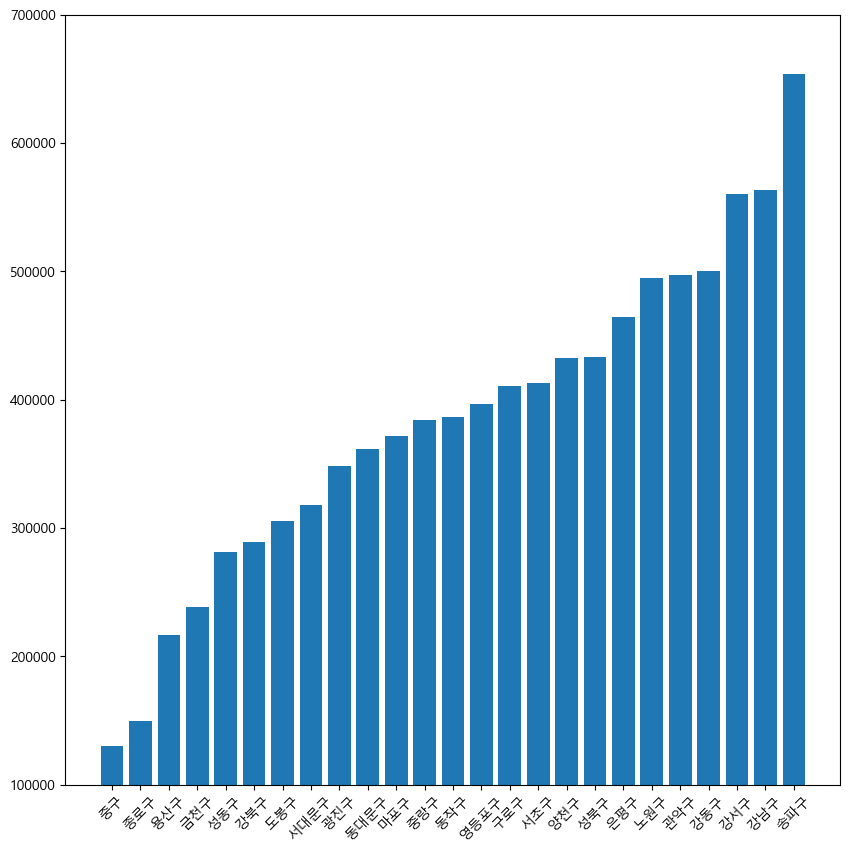

In [27]:
# 2025년 기준 자치구별 인구 수

plt.figure(figsize=(10,10))
plt.bar(sort_gu_population.index, sort_gu_population.values)
plt.ylim(100000,700000)
plt.xticks(rotation = 45)
plt.show()

In [29]:
population['2025 1/4.3'] = pd.to_numeric(population['2025 1/4.3'], errors='coerce')
population.dtypes

동별(1)          object
동별(2)          object
2025 1/4        int64
2025 1/4.1     object
2025 1/4.2     object
2025 1/4.3      int64
2025 1/4.4     object
2025 1/4.5     object
2025 1/4.6     object
2025 1/4.7     object
2025 1/4.8     object
2025 1/4.9     object
2025 1/4.10    object
2025 1/4.11    object
dtype: object

In [31]:
# 자치구별 65세 이상 인구수
over65_population = population.groupby('동별(2)')['2025 1/4.3'].sum()
sort_over65_population = over65_population.sort_values()
sort_over65_population

동별(2)
중구       27148
종로구      30242
용산구      39856
금천구      48898
성동구      51907
광진구      60780
마포구      60795
서대문구     60956
서초구      69429
동대문구     70498
영등포구     71660
강북구      72369
동작구      74258
도봉구      75363
양천구      81753
성북구      84607
중랑구      84905
구로구      85391
관악구      90299
강남구      92668
강동구      93581
은평구      99434
노원구     101968
강서구     109257
송파구     115654
Name: 2025 1/4.3, dtype: int64

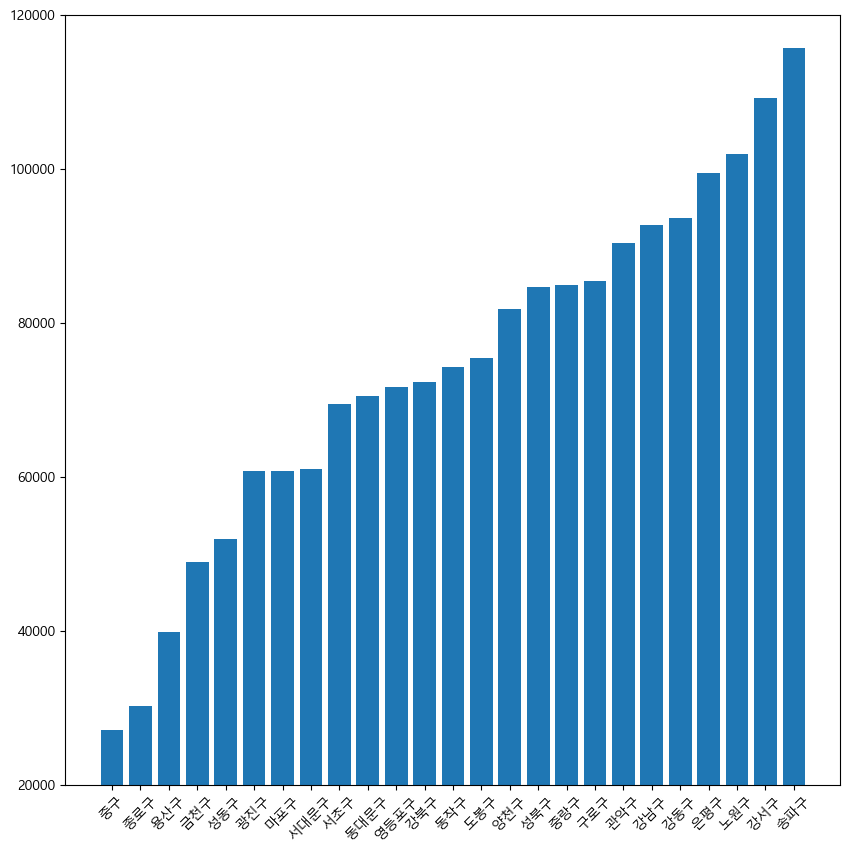

In [33]:
# 2025년 기준 자치구별 65세 이상 인구 수

plt.figure(figsize=(10,10))
plt.bar(sort_over65_population.index, sort_over65_population.values)
plt.ylim(20000,120000)
plt.xticks(rotation = 45)
plt.show()

In [35]:
# 자치구별 고령인구 비율 구하기

print(population['2025 1/4.3'].values)
print(population['2025 1/4'].values)

over65_ratio = over65_population / gu_population * 100
over65_ratio = over65_ratio.sort_values()
over65_ratio

[ 30242  27148  39856  51907  60780  70498  84905  84607  72369  75363
 101968  99434  60956  60795  81753 109257  85391  48898  71660  74258
  90299  69429  92668 115654  93581]
[149478 130418 216537 281062 348660 361950 384320 433569 288797 305391
 495111 464466 318085 371852 432901 560094 410727 238431 396834 386897
 497213 412715 563189 654127 500002]


동별(2)
마포구     16.349246
강남구     16.454157
서초구     16.822505
광진구     17.432456
송파구     17.680664
영등포구    18.057929
관악구     18.161030
용산구     18.406092
성동구     18.468167
강동구     18.716125
양천구     18.884918
서대문구    19.163431
동작구     19.193222
동대문구    19.477276
강서구     19.506904
성북구     19.514080
종로구     20.231740
금천구     20.508239
노원구     20.594978
구로구     20.790209
중구      20.816145
은평구     21.408241
중랑구     22.092267
도봉구     24.677545
강북구     25.058778
dtype: float64

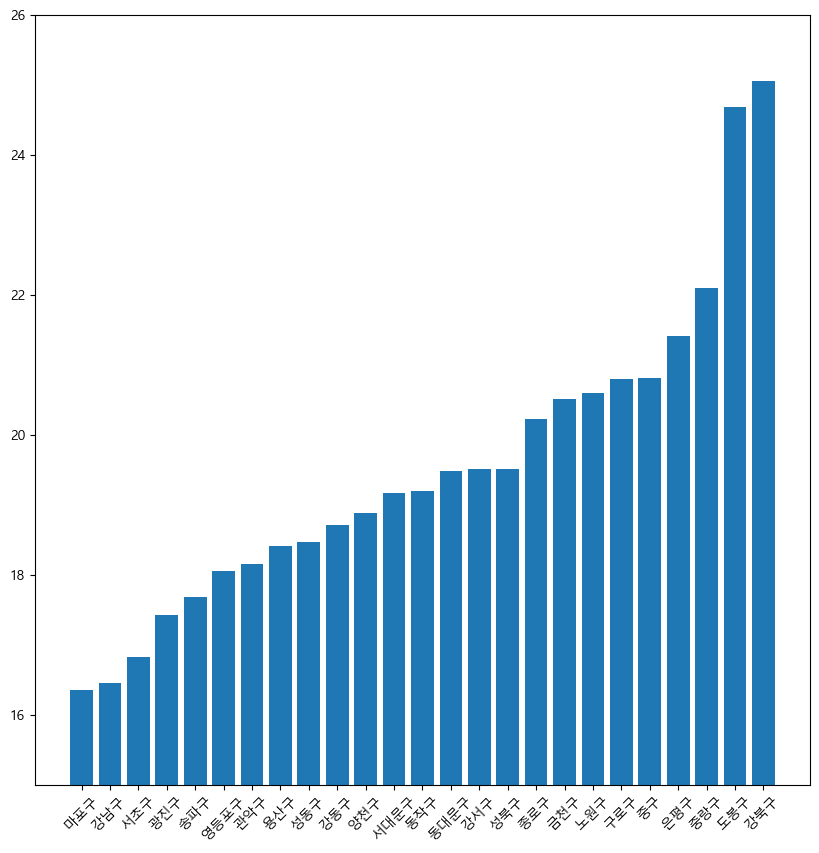

In [37]:
# 2025년 기준 자치구별 65세 이상 인구 비율 시각화
# 혹시 의미가 있을까 걍 해봄^^^

plt.figure(figsize=(10,10))
plt.bar(over65_ratio.index, over65_ratio.values)
plt.ylim(15,26)
plt.xticks(rotation = 45)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_9108\2952994892.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


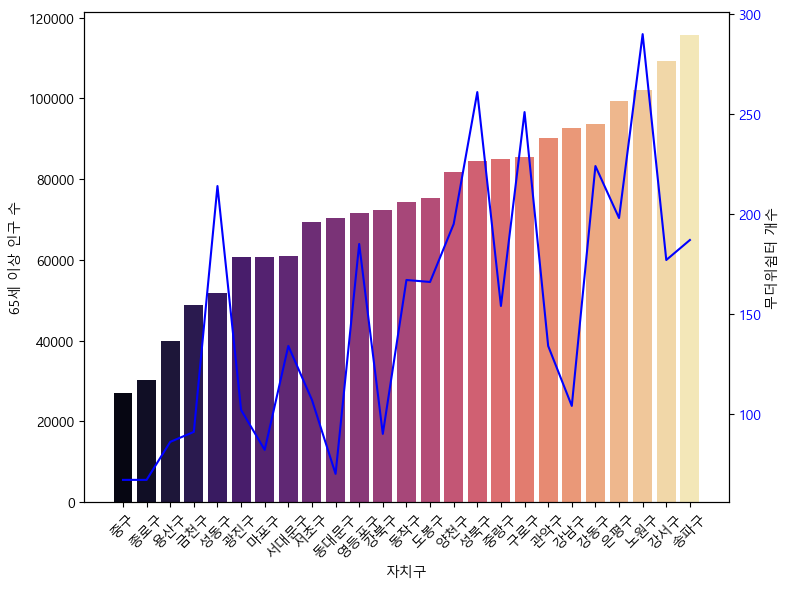

In [39]:
# 자치구별 65세 이상 인구 수과 무더위쉼터 개수

# Series를 DataFrame으로 변환
df_plot1 = sort_over65_population.reset_index()
df_plot1.columns = ['자치구', '65세 이상 인구 수'] # 컬럼 이름 예시로 바꿔줌

# 시각화
fig, ax1 = plt.subplots(figsize=(8,6))
sns.barplot(
    data=df_plot1,
    x='자치구',
    y='65세 이상 인구 수',
    palette = 'magma',
    ax=ax1
)
plt.xticks(rotation=45)

# Series를 DataFrame으로 변환
gu_count = gu_count.reset_index()
gu_count.columns = ['자치구', '무더위쉼터 개수']  # 컬럼 이름 바꿔줌

ax2 = ax1.twinx()
sns.lineplot(
    data = gu_count,
    x = '자치구',
    y = '무더위쉼터 개수',
    color = 'blue',
    ax = ax2
)

ax2.tick_params(axis='y', labelcolor='blue')
plt.tight_layout()
plt.show()

In [21]:
silver_hall = []
center = []
bank = []
library = []
church = []
sarangbang = []
welfare = []
green_smart = []

shelter_type = []

for i in df1['쉼터명칭']:
    if '경로당' in i:
        silver_hall.append(i)
    elif '주민센터' in i:
        center.append(i)
    elif '은행' in i or '금고' in i:
        bank.append(i)
    elif '도서관' in i:
        library.append(i)
    elif '교회' in i:
        church.append(i)
    elif '사랑방' in i:
        sarangbang.append(i)
    elif '복지' in i:
        welfare.append(i)
    elif '그린스마트' in i:
        green_smart.append(i)
        

shelter_num = len(df1['쉼터명칭'])

shelter_type.append(len(silver_hall)/shelter_num *100)
shelter_type.append(len(center)/shelter_num *100)
shelter_type.append(len(bank)/shelter_num *100)
shelter_type.append(len(library)/shelter_num *100)
shelter_type.append(len(church)/shelter_num *100)
shelter_type.append(len(sarangbang)/shelter_num *100)
shelter_type.append(len(welfare)/shelter_num *100)
shelter_type.append(len(green_smart)/shelter_num *100)

df3 = pd.DataFrame(shelter_type)
df3.index = ['경로당','주민센터','은행','도서관','교회','사랑방','복지관','그린스마트 쉼터']
df3

,0
경로당,68.077833
주민센터,11.175388
은행,2.734683
도서관,2.208783
교회,0.157770
사랑방,2.708388
복지관,4.838286
그린스마트 쉼터,0.841441


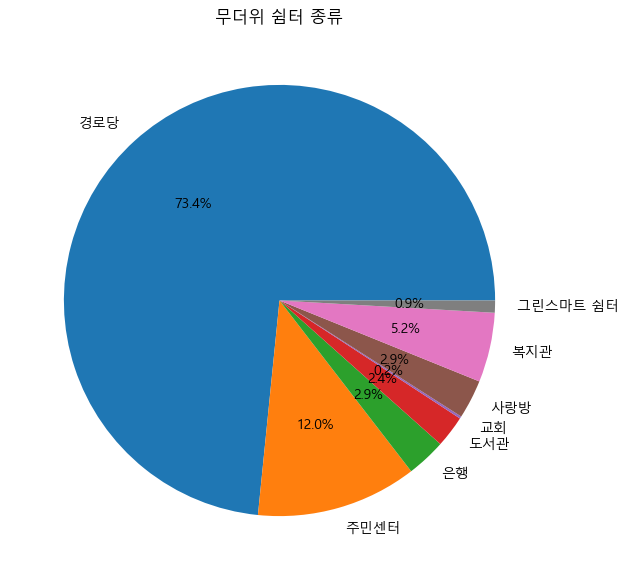

In [23]:
# 2. 무더위쉼터 종류가 다양할 것이다.
# 아님. 경로당이 압도적으로 많음.

plt.figure(figsize=(7,7))
plt.pie(shelter_type,
        labels = df3.index,
        autopct='%1.1f%%')

plt.title('무더위 쉼터 종류')
plt.show()

In [45]:
gu_count

,자치구,무더위쉼터 개수
0,중구,67
1,종로구,67
2,동대문구,70
3,마포구,82
4,용산구,86
5,강북구,90
6,금천구,91
7,광진구,102
8,강남구,104
9,서초구,107


In [41]:
%%writefile module/minipro1.py

import streamlit as st
import folium
import geopandas as gpd
import streamlit_folium as sf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

df1 = pd.read_csv('data/서울시 무더위쉼터.csv')

gu = []
for i in df1['지번주소']:
    i = i.split(' ')[1]
    gu.append(i)
df1['자치구'] = gu
df1.drop('지번주소', axis = 1 ,inplace=True)

gu_count = df1['자치구'].value_counts()


st.header('프로젝트 제목')
# ==========================세션 설정============================

if 'gu' not in st.session_state:
    st.session_state['gu'] = ''


# ==========================사이드바 제작============================
with st.sidebar.form(key = 'form1', clear_on_submit = True):
    st.subheader('자치구 선택')
    gu = st.selectbox('자치구',gu_count.index)

    if st.form_submit_button('submit'):
        st.session_state['gu'] = gu
        st.rerun()
# ==================컬럼 제작====================
tab1, tab2, tab3 = st.tabs(['가설 1','가설2','가설3'])

with tab1:
    st.header('가설 1. 자치구별로 무더위쉼터 개수가 비등비등할 것이다.')
# ===========================지도에 표시=====================
# 서울 자치구 GeoJSON 파일 읽기
geo_path = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"  # GeoJSON 파일 경로
geo_data = gpd.read_file(geo_path)
gu_count_df = df1['자치구'].value_counts().reset_index()
gu_count_df.columns = ['자치구', '무더위쉼터 개수']
data = gu_count_df.copy()

# 서울의 위도, 경도: 37.5665, 126.9780
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=10, tiles='CartoDB positron')

# 3. 데이터 병합 (GeoJSON + 거치대 개수 데이터)
geo_data = geo_data.merge(data, left_on='name', right_on='자치구') 
# 'name' 컬럼은 GeoJSON 파일의 자치구 이름 컬럼

# folium.Choropleth 클래스를 사용
# Choropleth 맵: 지역별로 색상을 다르게 하여 데이터를 시각화하는 지도
folium.Choropleth(
    geo_data=geo_data,
    name="choropleth",
    data=gu_count,
    columns=['자치구', '무더위쉼터 개수'],
    key_on='feature.properties.name', # GeoJSON 데이터와 data의 자치구 정보를 연결
    fill_color='YlGnBu',  # 색상 스케일
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='무더위쉼터 개수'
).add_to(seoul_map)

for _, row in geo_data.iterrows(): # geo_data 순회하면서 각 행(row)을 반복적으로 
    folium.GeoJson(
        row['geometry'],  # GeoJSON 형식의 geometry 데이터
        name=row['name'],
        tooltip=folium.Tooltip(f"{row['name']}: {row['무더위쉼터 개수']}개"),  # Tooltip에 표시되는 내용
        popup=folium.Popup(f"{row['name']}<br>쉼터 개수: {row['무더위쉼터 개수']}개", 
                          max_width=300)  # Popup 추가
    ).add_to(seoul_map)
    
sf.st_folium(seoul_map, width = 500, height=500)

with tab2:
    st.header('가설 2. 자치구별 65세 이상 인구 수과 무더위쉼터 개수')

with tab3:
    st.header('가설 3. 어쩌구저쩌구')

Overwriting module/minipro1.py
